In [21]:
using Plots; gr()
using LinearAlgebra

maxPos = 8
minPos = -8
stepPos = 0.5

freePropagator(finPos, startPos, finTime, startTime = 0, m = 1) = sqrt(m / (2 * pi * im * (finTime - startTime))) * exp(im * m / (2 * (finTime - startTime)) * (finPos - startPos)^2)  
freePropagatorC(qf, qfp, q0, q0p, tf, t0) = freePropagator(qf, q0, tf, t0) + freePropagator(qfp, q0p, tf, t0)
initStateFunction(q0, q0p, σ1, s1, p1, σ2, s2, p2) = (1//2 * pi * σ1)^(1//4) * exp(-(q0 - s1)^2 / (4 * σ1^2) + im * p1 * q0) * (1//2 * pi * σ2)^(1//4) * exp(-(q0p - s2)^2 / (4 * σ2^2) + im * p2 * q0p)
posToIndex(pos) = Int32((pos - minPos) / stepPos + 1)

pos1Vect = collect(minPos:stepPos:maxPos)
pos2Vect = collect(minPos:stepPos:maxPos)
posVectSize = size(pos1Vect, 1)
posMat = [(i, j) for i in pos1Vect, j in pos2Vect]

initState(q) = initStateFunction(q[1], q[2], 0.5, +1, 0, 0.5, -1, 0)# + initStateFunction(q[1], q[2], 0.5, -3, 0, 0.5, +3, 0)
initMat = initState.(posMat)
initMat = round.(initMat, digits = 6)

α = 0.02
m = 1

springPropagator1(qf, qfp, q0, q0p, tf, t0) = freePropagatorC(qf, qfp, q0, q0p, tf, t0) * (1 - im * α * tf / 6 * (-2 * (m * (q0 + qf)^2 + m * (q0p + qfp)^2 + im * tf) + 2*q0*q0p + q0*qfp + q0p*qf + 2*qf*qfp))

surface(pos1Vect, pos2Vect, abs.(initMat))

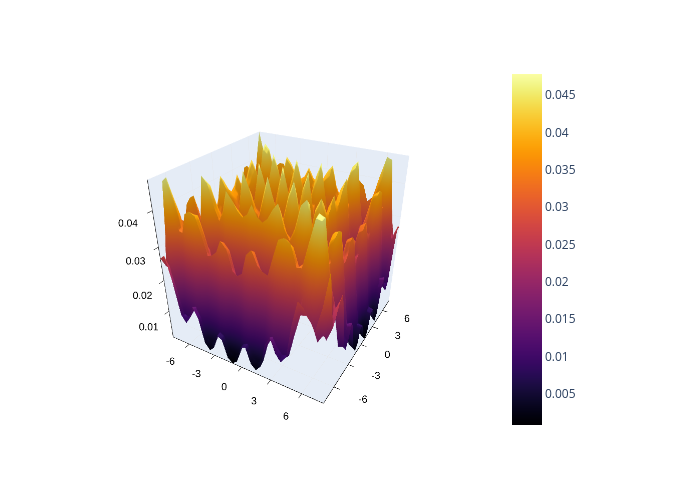

In [19]:
finalTime = 0.1
finalMat = Matrix{ComplexF32}(undef, posVectSize, posVectSize)

for xf in pos1Vect, xfp in pos2Vect
    sumPos = 0
    for i in 1:posVectSize, j in 1:posVectSize
        x0 = pos1Vect[i]
        x0p = pos2Vect[j]
        sumPos += springPropagator1(xf, xfp, x0, x0p, finalTime, 0) * initMat[i, j]
    end
    finalMat[posToIndex(xf), posToIndex(xfp)] = sumPos
end
currentPlot = surface(pos1Vect, pos2Vect, round.(normalize(abs2.(finalMat)), digits = 6))
# savefig(currentPlot, "currentplot.png")

In [8]:
finalMat = Matrix{ComplexF32}(undef, posVectSize, posVectSize)

anim = @animate for finalTime in collect(0.1:0.1:3)
    for xf in pos1Vect, xfp in pos2Vect
        sumPos = 0
        for i in 1:posVectSize, j in 1:posVectSize
            x0 = pos1Vect[i]
            x0p = pos2Vect[j]
            sumPos += springPropagator1(xf, xfp, x0, x0p, finalTime, 0) * initMat[i, j]
        end
        finalMat[posToIndex(xf), posToIndex(xfp)] = sumPos
    end
    surface(pos1Vect, pos2Vect, abs2.(normalize(finalMat)))
end
gif(anim, "Spring-1stOrd-NonEntangled.gif", fps = 15)

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range


InterruptException: InterruptException: